## Page traffic time series analysis of the freecodecamp website

In [2]:
import os 
os.chdir("C:/Users/Muskan/Downloads")

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df=pd.read_csv("fcc-forum-pageviews.csv",index_col="date",parse_dates=True)
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


Filtering data to remove top and bottom 2.5% as outliers

In [3]:
# Clean data by filtering out days when views were in top and botton 2.5% of the dataset these could be regarded as outliers
df = df[
    (df['value'] >= (df['value'].quantile(0.025)))
    &
    (df['value'] <= (df['value'].quantile(0.975)))
]

Line Plot for Daily traffic over the years

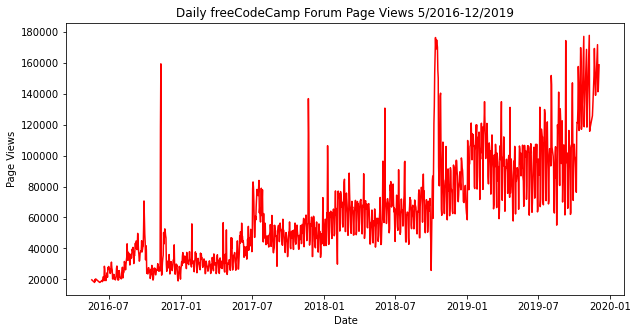

In [17]:
#Create a draw_line_plot function that uses Matplotlib to draw a line chart. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019"
def draw_line_plot():

    # Draw line plot
    fig = plt.figure(figsize=(10,5))
    plt.plot(df.index, df['value'],color='red')
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
  

draw_line_plot()


Barplot showing average daily page views for each month grouped by year.

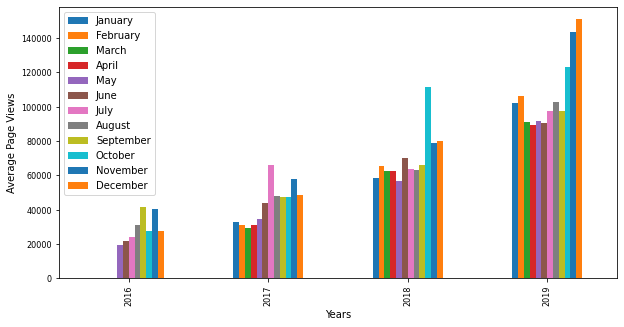

In [16]:
def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    #we have already parsed dates where df.index is the date column
    df["year"]=df.index.year
    df["months"]=df.index.month
    #grouping months by year and bars representing avg daily sales for each month
    df_bar = df.groupby(["year","months"])["value"].mean()
    df_bar=df_bar.unstack()
    
    #we will have to unstack the chart so the months are shown as side by side bars for each year as the grouping category
    

    # Draw bar plot
    fig=df_bar.plot.bar(legend=True,figsize=(10,5),ylabel="Average Page Views",xlabel="Years").figure
    
    #legend should have names of the month 
    plt.legend(['January','February','March','April','May','June','July','August','September',
            'October','November','December'])
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')

draw_bar_plot()

Boxplot showing distribution of traffic within a given year or month and how it compares over time. 

0       May
1       May
2       May
3       May
4       May
       ... 
1233    Nov
1234    Nov
1235    Nov
1236    Dec
1237    Dec
Name: month, Length: 1238, dtype: object


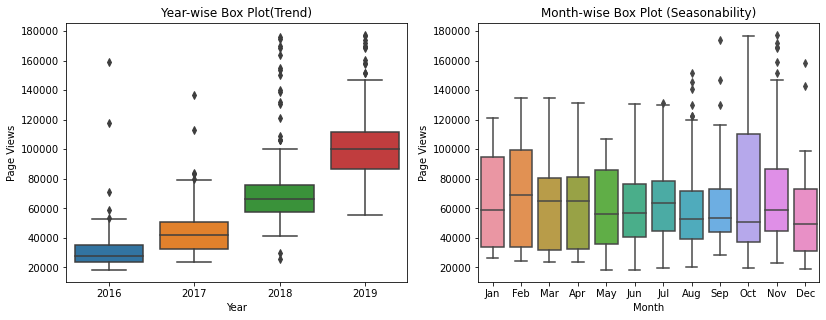

In [23]:
def draw_box_plot():
    # Prepare data for box plots (this part is done!)
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    
    #aggregating year and month wise data 
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    print(df_box['month'])

    # Draw box plots (using Seaborn)
    fig,ax=plt.subplots(nrows=1,ncols=2)
#subplots lets create plots side by side,here plots are year and month wise
#rows show the y axis on both plots which is the same ie values thus row=1
#columns show the x axis which is year in the first plot and month in the second

    fig.set_size_inches(12,5)
    fig.tight_layout(pad=4)
#tight_layout automatically adjusts subplot params so that the subplot(s) fits in to the figure area

    #Drawing the boxplots
    sns.boxplot(x=df_box['year'],y=df_box['value'],ax=ax[0]).set(xlabel='Year',ylabel='Page Views')
    sns.boxplot(x = df_box['month'], y = df_box['value'],order=["Jan","Feb", "Mar", "Apr", "May","Jun","Jul","Aug", "Sep","Oct","Nov","Dec"], ax = ax[1]).set(xlabel='Month', ylabel='Page Views')

    #Setting the titles of both the plots
    ax[0].set_title('Year-wise Box Plot(Trend)')
    ax[1].set_title('Month-wise Box Plot (Seasonability)')
    
    
    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    
draw_box_plot()

Conclusion: Traffic has imcreased over time and saw a major boost in 2019.
Traffic is the most consistent and the highest in the month of October